Ảnh đã được tải thành công!


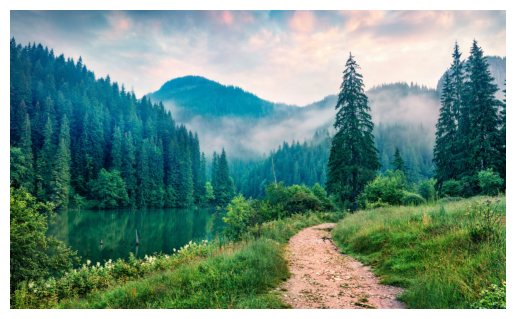

In [ ]:
import urllib.request as req
from PIL import Image
import matplotlib.pyplot as plt

img_url = "https://greggvanourek.com/wp-content/uploads/2023/08/Nature-path-by-water-trees-and-mountains-AdobeStock_291242770-scaled.jpeg?dl=1"
file_name = "./data/image.jpg"

# 1. Định nghĩa header User-Agent
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"
}

# 2. Tạo đối tượng Request
request = req.Request(img_url, headers=headers)

# 3. Mở URL và tải file
try:
    with req.urlopen(request) as response, open(file_name, "wb") as out_file:
        data = response.read()  # Đọc nội dung ảnh
        out_file.write(data)  # Ghi nội dung vào file

    print("Ảnh đã được tải thành công!")

    # Show image
    img = Image.open(file_name)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

except req.HTTPError as e:
    print(f"Lỗi HTTP (Code {e.code}): {e.reason}")
except Exception as e:
    print(f"Lỗi xảy ra: {e}")

### Lấy data bằng cách dùng Numpy

In [ ]:
from urllib import request

filenames = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz",
]

folder = "./data/data_fashion_mnist/"

base_url = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"

for name in filenames:
    print("Downloading " + name + "....")

    request.urlretrieve(base_url + name, folder + name)

print("Download completed.")

Download completed.


In [ ]:
import numpy as np
import gzip

# Load training images
with gzip.open(folder + "train-images-idx3-ubyte.gz", "rb") as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

# Load testing images
with gzip.open(folder + "t10k-images-idx3-ubyte.gz", "rb") as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

# Load training labels
with gzip.open(folder + "train-labels-idx1-ubyte.gz", "rb") as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)

# Load testing labels
with gzip.open(folder + "t10k-labels-idx1-ubyte.gz", "rb") as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


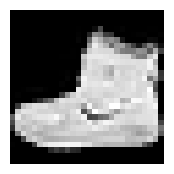

In [ ]:
img_x = X_train[0].reshape(28, 28)

plt.figure(figsize=(2, 2))
plt.imshow(img_x, cmap="gray")
plt.axis("off")
plt.show()

### Lấy data bằng PyTorch

In [ ]:
from torchvision.datasets import FashionMNIST

trainset = FashionMNIST(root="data", train=True, download=True)
img, label = trainset[0]
print(type(img), label)

100%|██████████| 26.4M/26.4M [00:09<00:00, 2.78MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 136kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 2.04MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.16MB/s]

<class 'PIL.Image.Image'> 9


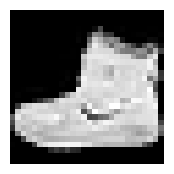

In [ ]:
img, _ = trainset[0]
plt.figure(figsize=(2, 2))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

transforms = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root="data", train=True, download=True, transform=transforms)

img, label = trainset[0]
print(type(img), label)

<class 'torch.Tensor'> 9


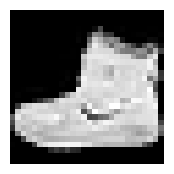

In [27]:
img, _ = trainset[0]
np_img = img.numpy()
np_img = np.transpose(np_img, (1, 2, 0))

plt.figure(figsize=(2, 2))
plt.imshow(np_img, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
trainloader = DataLoader(trainset, batch_size=1024, num_workers=2, shuffle=True)
print(len(trainloader))

59


In [ ]:
# batch_size = 3500
for i, (inputs, labels) in enumerate(trainloader, 0):
    print(f"Batch index {i} -- {inputs.shape} -- {labels.shape}")

Batch index 0 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 1 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 2 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 3 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 4 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 5 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 6 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 7 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 8 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 9 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 10 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 11 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 12 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 13 -- torch.Size([1024, 1, 28, 28]) -- torch.Size([1024])
Batch index 14 -- torch.Size([

In [32]:
print(img.shape)

torch.Size([1, 28, 28])


### Softmax without Normalization

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])
trainset = FashionMNIST(root="data", train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=1024, num_workers=10, shuffle=True)

testset = FashionMNIST(root="data", train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=1024, num_workers=10, shuffle=True)

# Define model
model = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
print(model)
device = torch.device("mps")
model = model.to(device)

# input_tensor = torch.rand(5, 28, 28)

# # Feeding the tensor into the model
# output = model(input_tensor)
# print(output.shape)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [ ]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [ ]:
max_epoch = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(max_epoch):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # Move inputs labels to device
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    epoch_accuracy = 100 * correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(
        f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%"
    )

    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/100], Loss: 1.8603, Accuracy: 49.66%, Test Loss: 1.5467, Test Accuracy: 63.58%
Epoch [2/100], Loss: 1.3784, Accuracy: 65.89%, Test Loss: 1.2591, Test Accuracy: 66.00%
Epoch [3/100], Loss: 1.1707, Accuracy: 67.69%, Test Loss: 1.1142, Test Accuracy: 67.20%
Epoch [4/100], Loss: 1.0555, Accuracy: 68.76%, Test Loss: 1.0267, Test Accuracy: 68.21%
Epoch [5/100], Loss: 0.9811, Accuracy: 69.93%, Test Loss: 0.9657, Test Accuracy: 69.33%
Epoch [6/100], Loss: 0.9288, Accuracy: 71.24%, Test Loss: 0.9221, Test Accuracy: 70.31%
Epoch [7/100], Loss: 0.8892, Accuracy: 72.32%, Test Loss: 0.8868, Test Accuracy: 71.40%
Epoch [8/100], Loss: 0.8579, Accuracy: 73.23%, Test Loss: 0.8593, Test Accuracy: 72.31%
Epoch [9/100], Loss: 0.8320, Accuracy: 73.97%, Test Loss: 0.8364, Test Accuracy: 73.08%
Epoch [10/100], Loss: 0.8101, Accuracy: 74.72%, Test Loss: 0.8169, Test Accuracy: 73.60%
Epoch [11/100], Loss: 0.7916, Accuracy: 75.19%, Test Loss: 0.7995, Test Accuracy: 74.06%
Epoch [12/100], Loss: 0.7752, 

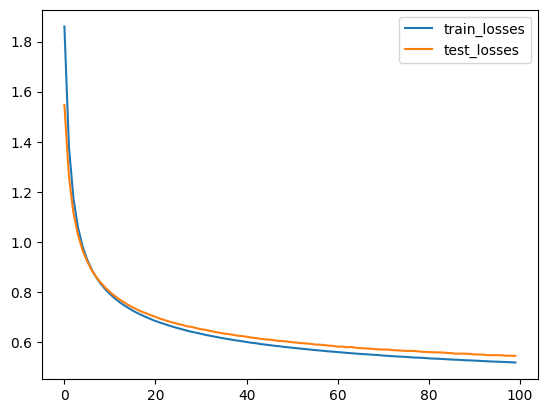

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label="train_losses")
plt.plot(test_losses, label="test_losses")
plt.legend()

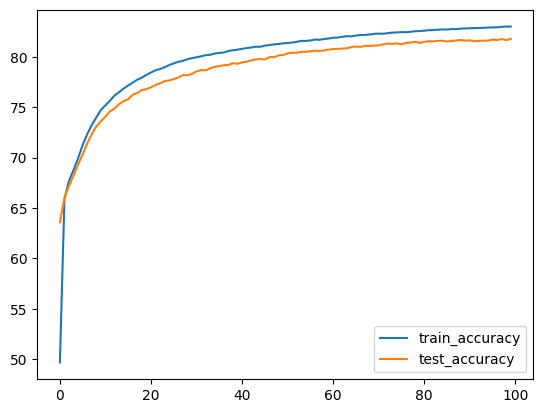

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label="train_accuracy")
plt.plot(test_accuracies, label="test_accuracy")
plt.legend()